## **Feature selection**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('train.csv')
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1.0,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1.0,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1.0,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1.0,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1.0,STANDING


In [ ]:
df.shape

(319, 563)

In [ ]:
df=df.drop(columns="subject")
df.shape

(319, 562)

In [ ]:
df["Activity"].value_counts()
df.dropna(inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# seperate features and targets
x = df.drop(columns = "Activity",axis = 1)
y=df["Activity"]

In [ ]:
# Encode target level
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:

# split data into training and testing set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(254, 561)
(64, 561)


### appling logistic regression

In [ ]:
log_reg = LogisticRegression(max_iter= 1000)
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# make prediction on the test case
y_pred = log_reg.predict(x_test)
y_pred.shape

(64,)

In [ ]:
acc_score = accuracy_score(y_test,y_pred)
print("Accuracy score is",acc_score)

Accuracy score is 1.0


In [ ]:
# 1. Remove Duplicate columns

def get_duplicate_columns(df):
    duplicate_col = {}
    seen_col = {}

    for col in df.columns:

        curr_col = df[col]

        #convert column data to bytes
        try:
            curr_col_hash = curr_col.values.tobytes()
        except AttributeError:
            curr_col_hash = curr_col.to_string().encode()

        if curr_col_hash in seen_col:
            if seen_col[curr_col_hash] in duplicate_col:
                duplicate_col[seen_col[curr_col_hash]].append(col)
            else:
                duplicate_col[seen_col[curr_col_hash]] = [col]
        else:
            seen_col[curr_col_hash] = col

    return duplicate_col


In [ ]:
duplicate_column = get_duplicate_columns(x_train)

In [ ]:
duplicate_column

{'tBodyAccMag-mean()': ['tBodyAccMag-sma()',
  'tGravityAccMag-mean()',
  'tGravityAccMag-sma()'],
 'tBodyAccMag-std()': ['tGravityAccMag-std()'],
 'tBodyAccMag-mad()': ['tGravityAccMag-mad()'],
 'tBodyAccMag-max()': ['tGravityAccMag-max()'],
 'tBodyAccMag-min()': ['tGravityAccMag-min()'],
 'tBodyAccMag-energy()': ['tGravityAccMag-energy()'],
 'tBodyAccMag-iqr()': ['tGravityAccMag-iqr()'],
 'tBodyAccMag-entropy()': ['tGravityAccMag-entropy()'],
 'tBodyAccMag-arCoeff()1': ['tGravityAccMag-arCoeff()1'],
 'tBodyAccMag-arCoeff()2': ['tGravityAccMag-arCoeff()2'],
 'tBodyAccMag-arCoeff()3': ['tGravityAccMag-arCoeff()3'],
 'tBodyAccMag-arCoeff()4': ['tGravityAccMag-arCoeff()4'],
 'tBodyAccJerkMag-mean()': ['tBodyAccJerkMag-sma()'],
 'tBodyGyroMag-mean()': ['tBodyGyroMag-sma()'],
 'tBodyGyroJerkMag-mean()': ['tBodyGyroJerkMag-sma()'],
 'fBodyAccMag-mean()': ['fBodyAccMag-sma()'],
 'fBodyBodyAccJerkMag-mean()': ['fBodyBodyAccJerkMag-sma()'],
 'fBodyBodyGyroMag-mean()': ['fBodyBodyGyroMag-sma()'

In [ ]:
x_train[['tBodyAccMag-mean()','tBodyAccMag-sma()','tGravityAccMag-mean()','tGravityAccMag-sma()']]

,tBodyAccMag-mean(),tBodyAccMag-sma(),tGravityAccMag-mean(),tGravityAccMag-sma()
209,-0.998249,-0.998249,-0.998249,-0.998249
76,-0.990560,-0.990560,-0.990560,-0.990560
94,-0.072821,-0.072821,-0.072821,-0.072821
221,-0.997374,-0.997374,-0.997374,-0.997374
310,-0.151225,-0.151225,-0.151225,-0.151225
...,...,...,...,...
188,-0.991618,-0.991618,-0.991618,-0.991618
71,0.294839,0.294839,0.294839,0.294839
106,-0.064423,-0.064423,-0.064423,-0.064423
270,-0.174540,-0.174540,-0.174540,-0.174540


In [ ]:
for one_list in duplicate_column.values():
    x_train.drop(columns = one_list , inplace=True)
    x_test.drop(columns = one_list , inplace=True)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(254, 540)
(64, 540)


### Variance threshold

In [ ]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.05)

In [ ]:
sel.fit(x_train)

VarianceThreshold(threshold=0.05)

In [ ]:
sum(sel.get_support())

328

In [ ]:
cols = x_train.columns[sel.get_support()]
cols

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X',
       ...
       'fBodyBodyGyroJerkMag-entropy()', 'fBodyBodyGyroJerkMag-meanFreq()',
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)'],
      dtype='object', length=328)

In [ ]:
x_train = sel.transform(x_train)
x_test = sel.transform(x_test)

x_train = pd.DataFrame(x_train,columns = cols)
x_test = pd.DataFrame(x_test,columns = cols)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- angle(Z,gravityMean)
- fBodyAcc-bandsEnergy()-1,16
- fBodyAcc-bandsEnergy()-1,16.2
- fBodyAcc-bandsEnergy()-1,24
- fBodyAcc-bandsEnergy()-1,24.2
- ...


In [ ]:
print(x_train.shape)
print(x_test.shape)

(254, 328)
(64, 328)


In [ ]:
x_train.head()

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,...,fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)"
0,-0.997188,-0.991669,-0.998653,-0.997425,-0.990207,-0.997744,-0.940043,-0.572742,-0.827748,0.851170,...,-1.000000,0.218246,-0.383171,-0.748745,0.227386,-0.087334,-0.013408,-0.278246,-0.509301,-0.137551
1,-0.994580,-0.986764,-0.996093,-0.995237,-0.986065,-0.996124,-0.937754,-0.561409,-0.822605,0.847851,...,-1.000000,0.355803,-0.645489,-0.906758,0.089428,-0.191935,0.377741,0.071105,0.797257,0.111748
2,-0.205516,0.106006,-0.210924,-0.269890,0.074273,-0.193726,-0.074992,0.043212,-0.295120,0.092366,...,0.611023,0.098224,-0.260270,-0.600994,0.592463,-0.448268,-0.579215,0.836638,-0.768015,0.256901
3,-0.995667,-0.991870,-0.996358,-0.995761,-0.991677,-0.996794,-0.939448,-0.573659,-0.825507,0.849903,...,-1.000000,0.145026,-0.523191,-0.804390,0.519163,-0.770630,-0.574786,0.844139,0.276640,-0.577824
4,-0.375189,0.015384,-0.004737,-0.433110,0.013376,0.036437,-0.106075,-0.143057,-0.117985,0.272639,...,0.396458,0.113440,-0.341641,-0.722725,0.021359,-0.805904,0.966307,0.436457,-0.607341,0.360079


## **Correlation**

In [ ]:
import seaborn as sns

<Axes: >

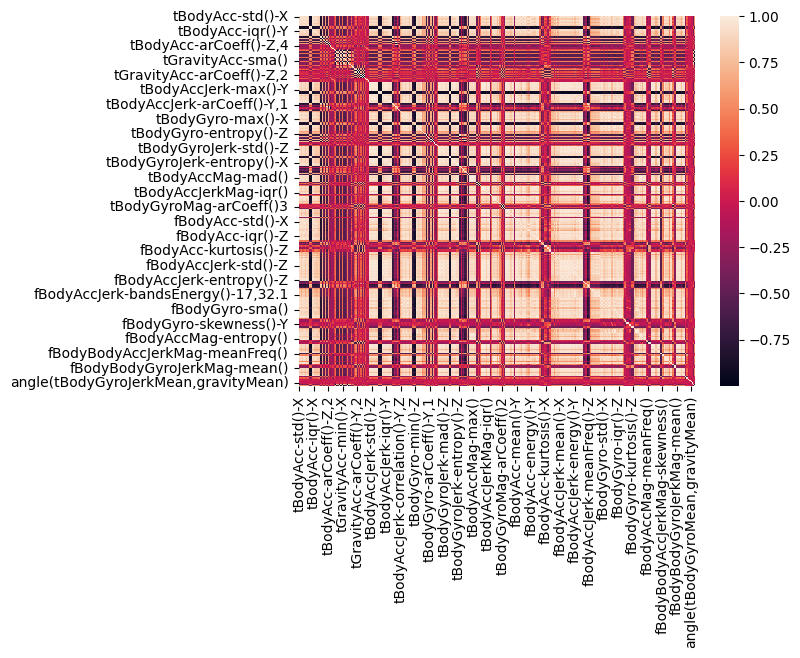

In [ ]:
sns.heatmap(x_train.corr())

In [ ]:
corr_metrix = x_train.corr()
corr_metrix

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,...,fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)"
tBodyAcc-std()-X,1.000000,0.911849,0.894605,0.999131,0.898451,0.885641,0.982334,0.899455,0.849343,-0.940406,...,0.953151,-0.167193,0.283581,0.211296,-0.018017,0.080135,-0.019549,-0.022228,-0.432498,0.548133
tBodyAcc-std()-Y,0.911849,1.000000,0.932026,0.906568,0.997448,0.923701,0.879009,0.954060,0.935880,-0.922411,...,0.965174,-0.260919,0.409866,0.340255,-0.003707,0.035217,-0.047573,-0.011496,-0.380899,0.557691
tBodyAcc-std()-Z,0.894605,0.932026,1.000000,0.892687,0.937845,0.998038,0.854535,0.911712,0.951407,-0.891140,...,0.938483,-0.332834,0.336226,0.259869,-0.002602,0.037525,-0.082129,-0.000708,-0.334709,0.499288
tBodyAcc-mad()-X,0.999131,0.906568,0.892687,1.000000,0.893429,0.884136,0.979402,0.894276,0.845102,-0.933214,...,0.948405,-0.163109,0.277555,0.205106,-0.024955,0.081909,-0.021457,-0.015603,-0.430376,0.544008
tBodyAcc-mad()-Y,0.898451,0.997448,0.937845,0.893429,1.000000,0.930812,0.862079,0.947941,0.941025,-0.914290,...,0.956001,-0.270000,0.407159,0.337993,-0.007873,0.032308,-0.060931,-0.011449,-0.374622,0.559477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyAccJerkMean),gravityMean)",0.080135,0.035217,0.037525,0.081909,0.032308,0.037102,0.058290,0.031258,0.032900,-0.049720,...,0.043915,-0.064085,0.029794,0.000754,0.008413,1.000000,0.155532,-0.045784,-0.043758,0.030067
"angle(tBodyGyroMean,gravityMean)",-0.019549,-0.047573,-0.082129,-0.021457,-0.060931,-0.091162,-0.002751,-0.038659,-0.066660,0.031390,...,-0.035132,0.047115,-0.050571,-0.048374,-0.105412,0.155532,1.000000,-0.152818,-0.020722,-0.028009
"angle(tBodyGyroJerkMean,gravityMean)",-0.022228,-0.011496,-0.000708,-0.015603,-0.011449,0.000742,-0.043838,0.017729,-0.001681,0.014267,...,-0.014690,-0.005516,0.016157,-0.010202,-0.046455,-0.045784,-0.152818,1.000000,0.135049,-0.110199
"angle(X,gravityMean)",-0.432498,-0.380899,-0.334709,-0.430376,-0.374622,-0.331911,-0.463526,-0.403333,-0.301150,0.368426,...,-0.378834,-0.129978,-0.049266,-0.031599,-0.000516,-0.043758,-0.020722,0.135049,1.000000,-0.869052


In [ ]:
# get the column name of the data frame
cols = corr_metrix.columns
cols

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X',
       ...
       'fBodyBodyGyroJerkMag-entropy()', 'fBodyBodyGyroJerkMag-meanFreq()',
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)'],
      dtype='object', length=328)

In [ ]:
# create a empty list to keep track to column to drop
to_drop = []

for i in range(len(cols)):
    for j in range(i+1,len(cols)):
        if corr_metrix.loc[cols[i],cols[j]] > 0.95:
            to_drop.append(cols[j])

print(len(to_drop))

3607


In [ ]:
to_drop = set(to_drop)
print(len(to_drop))

200


In [ ]:
x_train.drop(columns = to_drop,inplace=True)
x_test.drop(columns = to_drop,inplace=True)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(254, 128)
(64, 128)


In [ ]:
x_train.head()

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2",...,fBodyBodyGyroMag-skewness(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)"
0,-0.997188,-0.991669,-0.998653,0.851170,0.690762,-0.662714,-0.743016,-0.749703,0.102399,0.048740,...,-0.620068,-0.989425,0.218246,-0.383171,0.227386,-0.087334,-0.013408,-0.278246,-0.509301,-0.137551
1,-0.994580,-0.986764,-0.996093,0.847851,0.697628,-0.500496,-0.356215,-0.649855,0.181507,-0.094859,...,-0.075735,-0.994915,0.355803,-0.645489,0.089428,-0.191935,0.377741,0.071105,0.797257,0.111748
2,-0.205516,0.106006,-0.210924,0.092366,0.076433,0.400554,0.476713,0.013492,-0.433940,0.442078,...,-0.255902,-0.398557,0.098224,-0.260270,0.592463,-0.448268,-0.579215,0.836638,-0.768015,0.256901
3,-0.995667,-0.991870,-0.996358,0.849903,0.689739,-0.621817,-0.748935,-0.673365,0.318822,-0.078551,...,-0.360015,-0.999798,0.145026,-0.523191,0.519163,-0.770630,-0.574786,0.844139,0.276640,-0.577824
4,-0.375189,0.015384,-0.004737,0.272639,0.064727,0.393115,0.344548,-0.057244,-0.422586,0.313611,...,-0.402064,-0.904980,0.113440,-0.341641,0.021359,-0.805904,0.966307,0.436457,-0.607341,0.360079


## **Anova**

In [ ]:
from sklearn.feature_selection import f_classif,SelectKBest

In [ ]:
# select top 100 best features
sel = SelectKBest(f_classif,k=100).fit(x_train,y_train)

# display k best features
x_train.columns[sel.get_support()]

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-entropy()-X',
       'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z',
       'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2',
       'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-Y,1',
       'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,4',
       'tBodyAcc-correlation()-X,Y', 'tGravityAcc-mean()-X',
       'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z', 'tGravityAcc-sma()',
       'tGravityAcc-energy()-Y', 'tGravityAcc-energy()-Z',
       'tGravityAcc-entropy()-Y', 'tGravityAcc-entropy()-Z',
       'tGravityAcc-arCoeff()-X,1', 'tGravityAcc-arCoeff()-Y,1',
       'tGravityAcc-arCoeff()-Y,2', 'tGravityAcc-arCoeff()-Z,1',
       'tGravityAcc-arCoeff()-Z,2', 'tGravityAcc-correlation()-X,Y',
       'tBodyAccJerk-min()-X', 'tBodyAccJerk-min()-Y', 'tBodyAccJerk-min()-Z',
       'tBodyAccJerk-arCoeff()-Z,4',

In [ ]:
cols_k_best = x_train.columns[sel.get_support()]


In [ ]:
x_train = sel.transform(x_train)
x_test = sel.transform(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SelectKBest was fitted with feature names
  warnings.warn(


ValueError: X has 100 features, but SelectKBest is expecting 128 features as input.

In [ ]:
x_train = pd.DataFrame(x_train,columns = cols_k_best)
x_test = pd.DataFrame(x_test,columns = cols_k_best)

In [ ]:
x_train.shape

(254, 100)

In [ ]:
x_test.shape

(64, 100)

In [ ]:
x_train.head()

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2",...,fBodyGyro-skewness()-Z,"fBodyGyro-bandsEnergy()-9,16",fBodyBodyAccJerkMag-min(),fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroJerkMag-min(),"angle(X,gravityMean)","angle(Y,gravityMean)"
0,-0.997188,-0.991669,-0.998653,0.851170,0.690762,-0.662714,-0.743016,-0.749703,0.102399,0.048740,...,-0.557211,-0.999997,-0.994258,0.430860,-0.722055,-0.996048,0.444985,-0.989425,-0.509301,-0.137551
1,-0.994580,-0.986764,-0.996093,0.847851,0.697628,-0.500496,-0.356215,-0.649855,0.181507,-0.094859,...,-0.193600,-0.999913,-0.970358,0.424345,-0.709369,-0.995593,-0.175910,-0.994915,0.797257,0.111748
2,-0.205516,0.106006,-0.210924,0.092366,0.076433,0.400554,0.476713,0.013492,-0.433940,0.442078,...,-0.153164,-0.257429,-0.182194,0.112950,0.105042,-0.633177,0.210189,-0.398557,-0.768015,0.256901
3,-0.995667,-0.991870,-0.996358,0.849903,0.689739,-0.621817,-0.748935,-0.673365,0.318822,-0.078551,...,-0.321683,-0.999994,-0.993511,0.305444,-0.702820,-0.995481,0.195923,-0.999798,0.276640,-0.577824
4,-0.375189,0.015384,-0.004737,0.272639,0.064727,0.393115,0.344548,-0.057244,-0.422586,0.313611,...,-0.576271,-0.923861,-0.643331,-0.083092,-0.028937,-0.597623,0.000778,-0.904980,-0.607341,0.360079


## **moment of truth**

In [ ]:
# initilize a train logistic model

log_reg = LogisticRegression(max_iter = 1000)       # increase max_iter if it does_not coverage

# fit the data
log_reg.fit(x_train,y_train)

y_pred = log_reg.predict(x_test)

In [ ]:
acc_score = accuracy_score(y_test,y_pred)
print(acc_score)

1.0


## chi square test

In [ ]:
titanic = pd.read_csv("titanic (1).csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
ct = pd.crosstab(titanic["Survived"],titanic["Sex"],margins=True)
ct

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(ct)

Chi2ContingencyResult(statistic=263.05057407065567, pvalue=1.0036732821369117e-55, dof=4, expected_freq=array([[193.47474747, 355.52525253, 549.        ],
       [120.52525253, 221.47474747, 342.        ],
       [314.        , 577.        , 891.        ]]))

In [ ]:
score = []

for feature in titanic.columns:
    # create contingency table
    ct = pd.crosstab(titanic["Survived"],titanic[feature])

    # chi test
    p_value = chi2_contingency(ct)[1]
    score.append(p_value)

<Axes: >

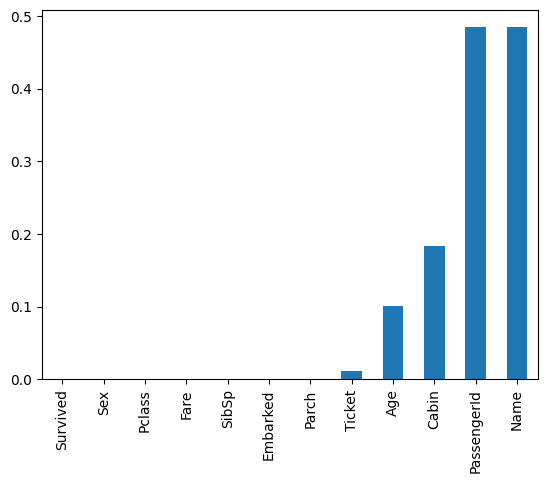

In [ ]:
# plot graph

pd.Series(score,index = titanic.columns).sort_values(ascending = True).plot(kind="bar")

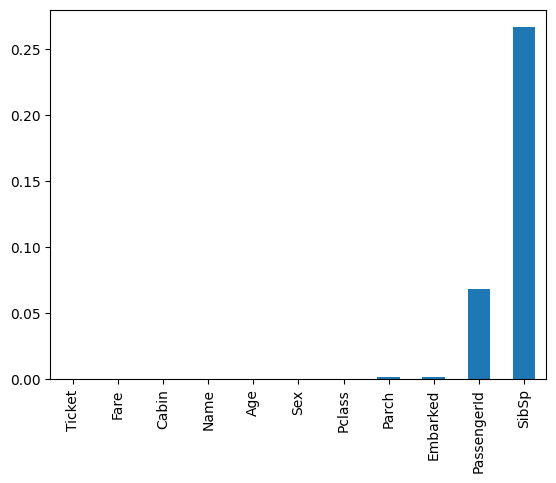

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt

# assuming titanic is a dataframe and survived is the target column

# Ecode label encoder
le = LabelEncoder()
tit_encoded = titanic.apply(le.fit_transform)

x = tit_encoded.drop(columns = "Survived",axis=1)
y=tit_encoded["Survived"]

# calculate the chi score
chi_score = chi2(x,y)

p_value = pd.Series(chi_score[1],index = x.columns)
p_value.sort_values(ascending = True,inplace = True)

# plotting the p_value
p_value.plot.bar()
plt.show()